### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [130]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
# Se optiene información del dataframe data, como número de registros, valores no nulos y el tipo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [14]:
# Se investiga los datos de cada columna en busca de datos faltantes o problemas
data['destination'].value_counts()

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

In [16]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [18]:
# Vemos que la columna car tiene poca información. Trataremos de no trabajar con ella
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [20]:
data['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

In [22]:
data['has_children'].value_counts()

has_children
0    7431
1    5253
Name: count, dtype: int64

In [24]:
data['occupation'].value_counts()

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [60]:
# Vemos que la columna income es un string donde hay rangos. Antes de usarlo debe de hacer cambios
data['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [36]:
# Utilizaremos la función rango_a_promedio() para obtener un valor promedio tipo float y agregarlo a una columna Promedio en el dataframe data
# la función retira el símbolo $, espacios y al final - para obtener los extremos del reango y poder sacar el promedio
def rango_a_promedio(rango):
    # Eliminar los símbolos de dólar y espacios
    rango = rango.replace('$', '').replace(' ', '').replace('Lessthan','500-').replace('orMore','-3500')
    # Dividir el rango en inicio y fin
    start, end = map(int, rango.split('-'))
    # Calcular el promedio
    return (start + end) / 2

In [90]:
data['Promedio'] = data['income'].apply(rango_a_promedio)
data[['income','Promedio']] 
# La columna Promedio ya fue agrgada al dataframe data

,income,Promedio
0,$37500 - $49999,43749.5
1,$37500 - $49999,43749.5
2,$37500 - $49999,43749.5
3,$37500 - $49999,43749.5
4,$37500 - $49999,43749.5
...,...,...
12679,$75000 - $87499,81249.5
12680,$75000 - $87499,81249.5
12681,$75000 - $87499,81249.5
12682,$75000 - $87499,81249.5


In [94]:
data['income']

0        $37500 - $49999
1        $37500 - $49999
2        $37500 - $49999
3        $37500 - $49999
4        $37500 - $49999
              ...       
12679    $75000 - $87499
12680    $75000 - $87499
12681    $75000 - $87499
12682    $75000 - $87499
12683    $75000 - $87499
Name: income, Length: 12684, dtype: object

3. Decide what to do about your missing data -- drop, replace, other...

In [96]:
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [100]:
data['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [102]:
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [104]:
data['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [108]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [110]:
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [112]:
def contar_filas(data):
    return len(data)

In [369]:
numero_filas_total = contar_filas(data)
data_acepta_cupon = data.query('Y == 1')
numero_filas_acepta = contar_filas(data_acepta_cupon)
porcentaje_acepta = numero_filas_acepta / numero_filas_total*100
print(f'Proporción que acepta cupón: {porcentaje_acepta}')

Proporción que acepta cupón: 56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

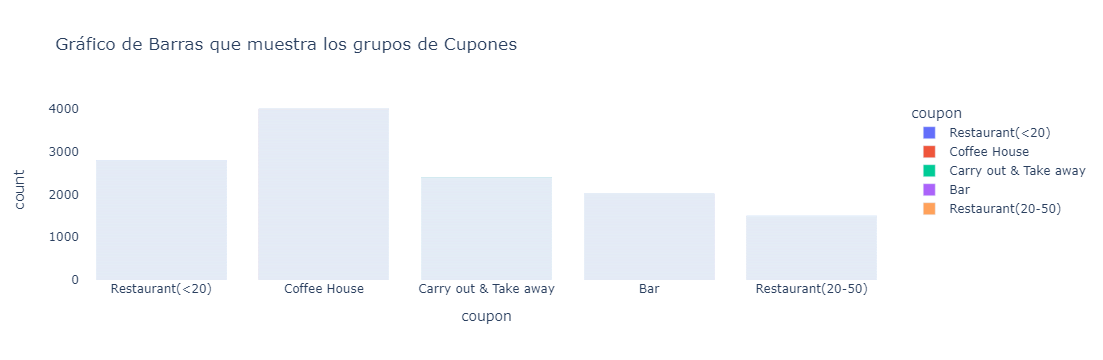

In [528]:
# Primero lo hacemos con la librería Plotly
fig = px.bar(data, x='coupon', color = 'coupon',  title='Gráfico de Barras que muestra los grupos de Cupones')
fig.update_layout(
    plot_bgcolor='white'
)
fig.show()

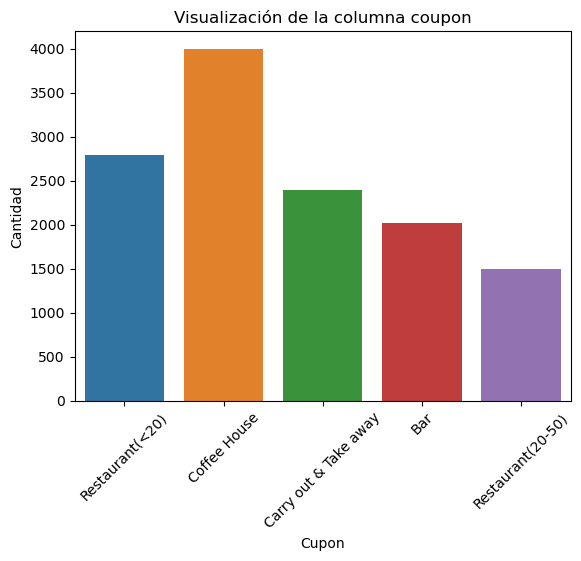

In [202]:
#sns.barplot(data=data, x='coupon',y='Y')
sns.countplot(x='coupon', data=data)
plt.title('Visualización de la columna coupon')
plt.xlabel('Cupon')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

In [214]:
fig1 = px.histogram(data, x='temperature', title='Histograma de Temperaturas', color_discrete_sequence=['indianred'],nbins=20)

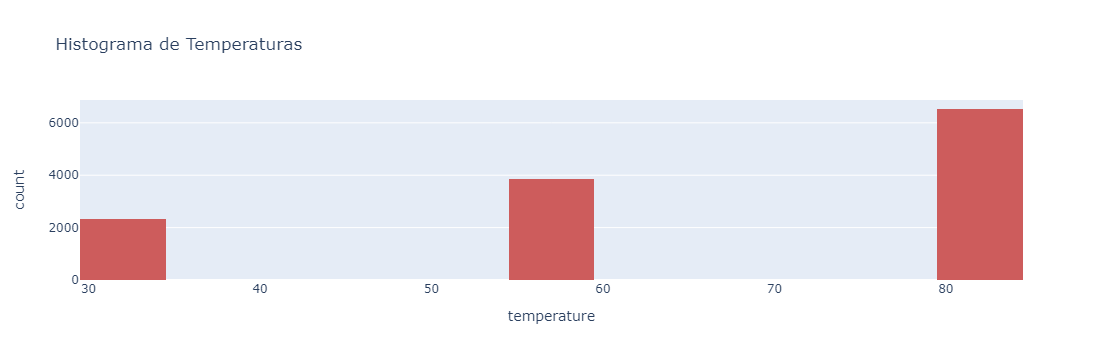

In [216]:
fig1.show()

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



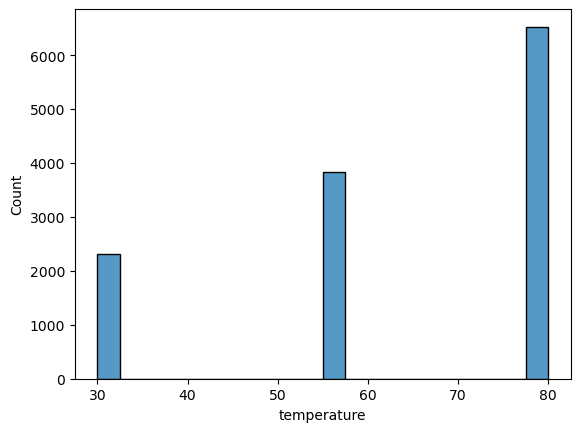

In [533]:
sns.histplot(data['temperature'], kde=False, bins = 20)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [381]:
# Obtenemos el dataframe de cupones bar
df_cupones_bar=data.query('coupon == "Bar"')
df_cupones_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Promedio
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,43749.5
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,1,0,1,43749.5
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,1,0,1,0,43749.5
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,68749.5
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,68749.5


2. What proportion of bar coupons were accepted?


In [395]:
# Total de cupones Bar
total_cupones_bar = contar_filas(df_cupones_bar)

# Sub Dataframe de cupones Bar aceptados
df_cupones_bar_aceptados = df_cupones_bar.query('Y == 1')

# Cantidad de cupones Bar aceptados
cupones_acepta = contar_filas(df_cupones_bar_aceptados)

# Ratio de cupones Bar aceptados en relación a todos los cupones Bar
porcentaje_bar_acepta = cupones_acepta / total_cupones_bar*100

# Impresión
print(f'Total de cupones Bar: {total_cupones_bar}')
print(f'Cantidad de cupones Bar aceptados: {cupones_acepta}')
print(f'Ratio de cupones Bar aceptados/Total cupones Bar: {porcentaje_bar_acepta}')


Total de cupones Bar: 2017
Cantidad de cupones Bar aceptados: 827
Ratio de cupones Bar aceptados/Total cupones Bar: 41.00148735746158


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [401]:
# Obtención del sub dataframe de cupones Bar aceptados donde los drivers iban al bar 3 o menos veces
df_cupones_menor_3= df_cupones_bar_aceptados.query('Bar == "1~3" or Bar == "less1"')

# Cálaculo del ratio cupones menor igual a 3 visitas al Bar / total de cupones bar aceptados
porcentaje_cupones_menor_3 = contar_filas(df_cupones_menor_3)/cupones_acepta*100

# Obtención del sub dataframe de cupones Bar aceptados donde los drivers iban al bar mas de 3 veces
df_cupones_mayor_3 = df_cupones_bar_aceptados.query('Bar == "4~8" or Bar == "gt8"')

# Cálaculo del ratio cupones mayores a 3 visitas al Bar / total de cupones bar aceptados
porcentaje_cupones_mayor_3 = contar_filas(df_cupones_mayor_3)/cupones_acepta*100

# Impresión
print(f'Ratio de cupones de 3 o menos visitas al bar/cupones bar aceptados: {porcentaje_cupones_menor_3}')
print(f'Ratio de cupones de mas de 3 visitas al bar/cupones bar aceptados: {porcentaje_cupones_mayor_3}')

Ratio de cupones de 3 o menos visitas al bar/cupones bar aceptados: 61.66868198307134
Ratio de cupones de mas de 3 visitas al bar/cupones bar aceptados: 18.500604594921402


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [266]:
df_cupones_bar_aceptados['age'].value_counts()

age
21         211
26         193
31         125
50plus      84
41          77
36          63
46          38
below21     36
Name: count, dtype: int64

In [431]:
# Lista de drivers que tienen mas de 25 años
lista_age_mas25 ={"26","31","50plus","36","41","46"}

lista_age_menos25 = {"21", "below21"}

# Lista de drivers que van al bar mas de una vez
lista_veces_bar={"1~3", "4~8", "gt8"}

In [433]:
# Obtenemos un sub Dataframe de cupones de bar aceptados con las condiciones de las lsitas: lista_age y lista_veces_bar
df_drivers4a= df_cupones_bar_aceptados.query('Bar in @lista_veces_bar and age in @lista_age_mas25')

# Ratio de drivers qeu cumplen la condición de ir al bar mas de una vez y que tienen mas de 25 años / Total de cupones aceptados
porcentaje_drivers4a = contar_filas(df_drivers4a)/cupones_acepta*100

df_drivers4b= df_cupones_bar_aceptados.query('Bar in @lista_veces_bar and age in @lista_age_menos25')
porcentaje_drivers4b = contar_filas(df_drivers4b)/cupones_acepta*100

# Impresión
print(f'Ratio de drivers que van mas de 1 vez al bar y tiene mas de 25 años / Total de cupones bar aceptados: {porcentaje_drivers4a}')
print(f'Ratio de drivers que van mas de 1 vez al bar y tiene menos o igual de 25 años / Total de cupones bar aceptados: {porcentaje_drivers4b}')

Ratio de drivers que van mas de 1 vez al bar y tiene mas de 25 años / Total de cupones bar aceptados: 35.30834340991535
Ratio de drivers que van mas de 1 vez al bar y tiene menos o igual de 25 años / Total de cupones bar aceptados: 14.268440145102781


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [278]:
# Primero cnoceremos la distribución de los pasajeros de los drivers sobre el dataframe de cupones bar aceptados
df_cupones_bar_aceptados['passanger'].value_counts()

passanger
Alone        489
Friend(s)    188
Partner      107
Kid(s)        43
Name: count, dtype: int64

In [405]:
# Lista de pasajeros que no son Kids
lista_passanger =["Friend(s)","Partner"]

# Se obtiene el dataframe df_drivers5 con las condiciones de la pregunta 5
df_drivers5= df_cupones_bar_aceptados.query('(Bar in @lista_veces_bar) and passanger in @lista_passanger and occupation != "Farming Fishing & Forestry"')

# Ratio de drivers que van mas de 1 vez y tienen pasajeros que no son niños y tiene ocupación diferente a farming, fishing, or forestry / cupones bar aceptados
porcentaje_drivers5 = contar_filas(df_drivers5)/cupones_acepta*100

# Impresión
print(f'Ratio de drivers que van mas de 1 vez y tienen pasajeros que no son niños y tiene ocupación diferente a farming, fishing, or forestry / cupones bar aceptados: {porcentaje_drivers5}')

Ratio de drivers que van mas de 1 vez y tienen pasajeros que no son niños y tiene ocupación diferente a farming, fishing, or forestry / cupones bar aceptados: 16.928657799274486


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [306]:
data['maritalStatus'].value_counts()

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

In [314]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [ ]:
# Primero vamos a contestar las tres condiciones juntas

In [417]:
# Lista de veces que va mas de 1 vez al bar
lista_veces_bar={"1~3", "4~8", "gt8"}

# Lista de pasajeros que no son niños
lista_passanger ={"Friend(s)","Partner"}
# Lista de edades por debajo de los 30 años

# lista de veces que va a restauranes baratos, mayores a 4 veces
lista_veces_rest = {"4~8", "gt8"}

df_cupones6=data.query('(coupon == "Bar" and Y == 1 and Bar in @lista_veces_bar and passanger in @lista_passanger and maritalStatus != "Widowed") or (coupon == "Bar" and Y == 1 and Bar in @lista_veces_bar and age in @lista_age6) or (coupon == "Restaurant(<20)" and Y == 1 and RestaurantLessThan20 in @lista_veces_rest and Promedio < 50_000)')
porcentaje_drivers6 = contar_filas(df_cupones6)/numero_filas_acepta*100
print(f'Ratio de condiciones de la pregunta 6 / número total de cupones aceptados: {porcentaje_drivers6}')

Ratio de condiciones de la pregunta 6 / número total de cupones aceptados: 9.153952843273231


In [419]:
# Respuesta a la 1era condición: "go to bars more than once a month, had passengers that were not a kid, and were not widowed OR"
df_cupones6_1=data.query('coupon == "Bar" and Y == 1 and Bar in @lista_veces_bar and passanger in @lista_passanger and maritalStatus != "Widowed"')
porcentaje_drivers6_1 = contar_filas(df_cupones6_1)/numero_filas_acepta*100
print(f'Ratio Condición de la pregunta 6.1 / número total de cupones aceptados: {porcentaje_drivers6_1}')

Ratio Condición de la pregunta 6.1 / número total de cupones aceptados: 1.9417475728155338


In [421]:
# Respuesta a la 2da condición: "go to bars more than once a month and are under the age of 30 OR"
df_cupones6_2=data.query('coupon == "Bar" and Y == 1 and Bar in @lista_veces_bar and age in @lista_age6')
porcentaje_drivers6_2 = contar_filas(df_cupones6_2)/numero_filas_acepta*100
print(f'Ratio condición de la pregunta 6.2 / número total de cupones aceptados: {porcentaje_drivers6_2}')

Ratio condición de la pregunta 6.2 / número total de cupones aceptados: 3.453536754507628


In [423]:
# Respuesta a la 3era condición: "go to cheap restaurants more than 4 times a month and income is less than 50K."
df_cupones6_3=data.query('coupon == "Restaurant(<20)" and Y == 1 and RestaurantLessThan20 in @lista_veces_rest and Promedio < 50_000')
porcentaje_drivers6_3 = contar_filas(df_cupones6_3)/numero_filas_acepta*100
print(f'Ratio condición de la pregunta 6.3 / número total de cupones aceptados: {porcentaje_drivers6_3}')

Ratio condición de la pregunta 6.3 / número total de cupones aceptados: 4.979195561719833


In [365]:
df_cupones_bar_aceptados['Bar'].value_counts()

Bar
1~3      257
less1    253
never    156
4~8      117
gt8       36
Name: count, dtype: int64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Estas son mis hipótesis basadas en las observaciones anteriores
a) Hay una alta aceptación de conductores que aceptaron el cupon de bar, que bordea el 41% de los cupones Bar.
b) El 61.67% de los cupones bar que fueron aceptados tuvieron 3 o menos visitas al bar. Esto nos indica que los condictores van mas de una vez al bar lo cuál es positivo para realizar una campaña.
c) El 18.50% de los cupones bar que fueron aceptados tuvieron mas de 3 visitas al bar. También este porcentaje es positivo porque se espera a conductores que pueden hacer más de 3 visitas al bar.
d) El 35.31% de los cupones bar que fueron aceptados tuvieron mas de 1 vista al bar y los drivers tenían mas de 25 años. Lo que nos indica que los conductores de mas de 25 años tienen preferncia por los bares.
e) El 14.27% de los cupones bar que fueron aceptados tuvieron mas de 1 vista al bar y los drivers tenían menos o igual a 25 años. Este ratio nos dice que los menores de 25 años tienen poca costumbre de ir al bar.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Estamos escogiendo el grupo de cupones Coffe House

In [435]:
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [470]:
df_cupones_coffehouse=data.query('coupon == "Coffee House" and Y == 1')

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



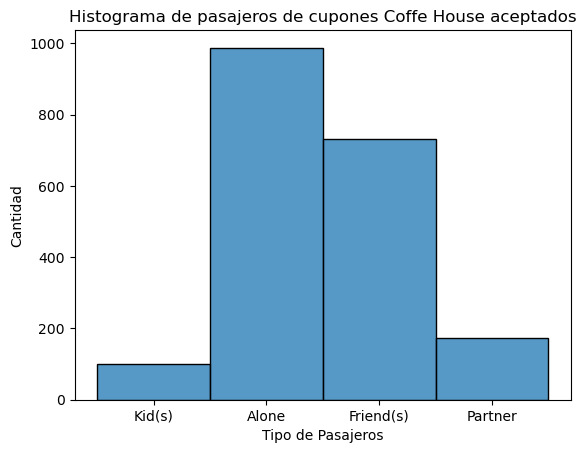

In [472]:
sns.histplot(df_cupones_coffehouse['passanger'], kde=False, bins = 20)
plt.title('Histograma de pasajeros de cupones Coffe House aceptados')
plt.xlabel('Tipo de Pasajeros')
plt.ylabel('Cantidad')
plt.show()
            

In [526]:
df_cupones_coffehouse['passanger'].value_counts()

passanger
Alone        988
Friend(s)    733
Partner      174
Kid(s)       100
Name: count, dtype: int64

In [502]:
# Usamos groupby para agrupar por passanger y obtener con count(*) las cantidades de cada tipo de pasajeros
df_grouped = df_cupones_coffehouse.groupby('passanger')['passanger'].count().reset_index(name='count')

# A la nueva columna count le cambiamos de nombre a Cantidad
df_grouped = df_grouped.rename(columns={'passanger': 'passanger', 'count': 'Cantidad'})
df_grouped

,passanger,Cantidad
0,Alone,988
1,Friend(s),733
2,Kid(s),100
3,Partner,174


In [520]:
# Obtenemos el total de pasajeros de los cupones Coffe House aceptados
total_pasajeros = df_grouped['Cantidad'].sum()
print(total_pasajeros)

1995


In [524]:
# Calculamos la columna ratio que contiene la distribución porcentual de los tipos de pasajeros.
df_grouped['ratio']= df_grouped['Cantidad']/total_pasajeros*100
df_grouped

,passanger,Cantidad,ratio
0,Alone,988,49.523810
1,Friend(s),733,36.741855
2,Kid(s),100,5.012531
3,Partner,174,8.721805


Como se observa el 36.74% de los pasajeros del grupo de cupones Coffe House son Friend(s), el 8.72% son Part5ner, 5.01% son Kid(s) y los conductores no llevan pasajeros 49.52%.